In [1]:
from bggcomplex import *
from lie_algebra_module import *
import numpy as np

In [2]:
BGG = BGGComplex("A3")
BGG.find_cycles();

In [5]:
print('hey')

hey


In [3]:
Solver = BGGMapSolver(BGG,BGG.zero_root)

In [4]:
Solver.solve(parallel=False);

In [8]:
print(Solver.timer)

{'index': 0.001132965087890625, 'vect': 0.0067577362060546875, 'basis': 0.0067255496978759766, 'mult': 0.006826639175415039, 'linalg': 0.40710949897766113}


In [9]:
Solver.check_maps()

checked 126 cycles, with no problems found!


In [10]:
BGG.compute_signs()

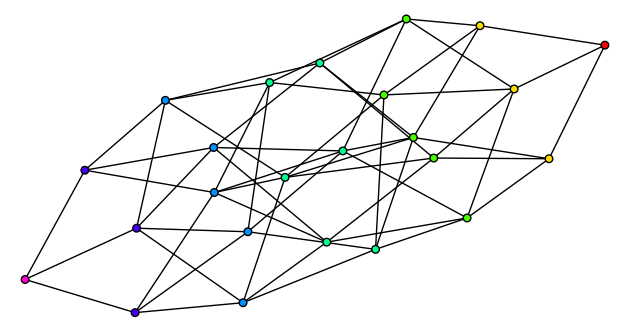

In [11]:
BGG.plot_graph().plot()

In [12]:
roots=BGG.W.domain().simple_roots()
roots

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [13]:
dom = BGG.W.domain()
cr= dom.coroot_lattice()

In [14]:
fun=dom.fundamental_weights_from_simple_roots()
fun

Finite family {1: (3/4, -1/4, -1/4, -1/4),  2: (1/2, 1/2, -1/2, -1/2),  3: (1/4, 1/4, 1/4, -3/4)}

In [15]:
dom.simple_coroots()

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [16]:
[BGG._weight_to_tuple(r) for r in fun.values()]

[[3/4, 1/2, 1/4], [1/2, 1, 1/2], [1/4, 1/2, 3/4]]

In [17]:
dom = BGG.W.domain()
dom.simple_coroots()

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [18]:
dom.simple_roots()

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [19]:
BGG._tuple_to_weight([1,1,1/2])

(1, 0, -1/2, -1/2)

In [20]:
mu=fun[1]

In [21]:
mu = BGG.zero_root

In [22]:
[BGG._tuple_to_weight(BGG.dot_action(w,mu))-mu for w in BGG.W]

[(0, 0, 0, 0),
 (-3, 0, 0, 3),
 (-3, 0, 2, 1),
 (-3, 1, 0, 2),
 (-2, 0, 2, 0),
 (-2, 0, -1, 3),
 (0, 0, -1, 1),
 (-2, 1, -1, 2),
 (-2, 1, 1, 0),
 (-2, -2, 1, 3),
 (0, -2, 1, 1),
 (-2, -2, 2, 2),
 (-1, 1, 0, 0),
 (-1, -2, 0, 3),
 (-1, -2, 2, 1),
 (0, -2, 0, 2),
 (-1, -1, 2, 0),
 (-1, -1, -1, 3),
 (-1, 1, -1, 1),
 (0, -1, -1, 2),
 (0, -1, 1, 0),
 (-3, -1, 1, 3),
 (-3, 1, 1, 1),
 (-3, -1, 2, 2)]

In [23]:
def is_dot_regular(mu):
    stab_counter = 0
    for w in BGG.W:
        if w.action(mu+BGG.rho)-BGG.rho==mu:
            stab_counter+=1
    if stab_counter<=1:
        return True
    else:
        return False

In [24]:
(BGG.rho-fun[1]).is_dominant()

True

In [25]:
mu=(5*BGG.simple_roots[1]+6*BGG.simple_roots[2]+5*BGG.simple_roots[3])
print(mu.is_dominant())
print(BGG.is_dot_regular(mu))

IndexError: list index out of range

In [27]:
BGG.make_dominant(mu)

(
              [1 0 0 0]
              [0 1 0 0]
              [0 0 1 0]
(0, 0, 0, 0), [0 0 0 1]
)

In [28]:
e = list(BGG.LA.basis())[0]
f = list(BGG.LA.basis())[1]
e

E[alpha[3]]

In [29]:
BGG.PBW_alg_gens
BGG.LA.basis()
pbw_to_la={str(value):BGG.LA.basis()[key] for key,value in dict(BGG.PBW_alg_gens).items()}
pbw_to_la

{'PBW[-alpha[1] - alpha[2] - alpha[3]]': E[-alpha[1] - alpha[2] - alpha[3]],
 'PBW[-alpha[1] - alpha[2]]': E[-alpha[1] - alpha[2]],
 'PBW[-alpha[1]]': E[-alpha[1]],
 'PBW[-alpha[2] - alpha[3]]': E[-alpha[2] - alpha[3]],
 'PBW[-alpha[2]]': E[-alpha[2]],
 'PBW[-alpha[3]]': E[-alpha[3]],
 'PBW[alpha[1] + alpha[2] + alpha[3]]': E[alpha[1] + alpha[2] + alpha[3]],
 'PBW[alpha[1] + alpha[2]]': E[alpha[1] + alpha[2]],
 'PBW[alpha[1]]': E[alpha[1]],
 'PBW[alpha[2] + alpha[3]]': E[alpha[2] + alpha[3]],
 'PBW[alpha[2]]': E[alpha[2]],
 'PBW[alpha[3]]': E[alpha[3]],
 'PBW[alphacheck[1]]': h1,
 'PBW[alphacheck[2]]': h2,
 'PBW[alphacheck[3]]': h3}

In [30]:
#for e in BGG.LA.basis():
#    result=0
#    for term,coefficient in elt:
#        sub_result=e
#        for factor,power in term:
#            for _ in range(power):
#                sub_result=BGG.LA.bracket(pbw_to_la[str(factor)],sub_result)
#        result+=sub_result
#    print(e,result)

In [31]:
def universal_enveloping_algebra_action(pbw_elt,e):
    result=0
    for term,coefficient in pbw_elt:
            sub_result=e
            for factor,power in term:
                for _ in range(power):
                    sub_result=BGG.LA.bracket(factor,sub_result)
            result+=sub_result
    return result

We want to implement the $U(\mathfrak g)$ action on the module
$$
    M_i^j=\bigoplus{}_{r=0}^{j+\frac k2}\left(\left(\bigodot{}^{j+\frac k2-r}\mathfrak u \right)\otimes\left(\bigwedge^r\mathfrak g\right)\otimes\left(\bigwedge{}^{j+\frac k2}\mathfrak n \right) \right)
$$
For this we need two things, one is finding a basis of this module, and second we define the action on it. Unfortunately I can't find a good out of the box implementation for either of these, so we are going to have to do it ourselves. Ideally we can use this to extend sage a little bit. 

Sagemath has a class FreeModuleTensor, it can deal with alternating and symmetric tensors. But it specifically says it can not deal with tensor products of different modules, whereas that is precisely what we need. We should investigate how this class work, and extend it with this functionality. Besides, that module seems to focus on doing stuff without a specific basis. We want to do everything in a basis, because the whole point is to compute a basis. 

We should make an instance of CombinatorialFreeModule

In [32]:
{tuple(a):a for a in BGG.LA.basis().keys()}

{((1, -1),): -alpha[1],
 ((1, -1), (2, -1)): -alpha[1] - alpha[2],
 ((1, -1), (2, -1), (3, -1)): -alpha[1] - alpha[2] - alpha[3],
 ((1, 1),): alphacheck[1],
 ((1, 1), (2, 1)): alpha[1] + alpha[2],
 ((1, 1), (2, 1), (3, 1)): alpha[1] + alpha[2] + alpha[3],
 ((2, -1),): -alpha[2],
 ((2, -1), (3, -1)): -alpha[2] - alpha[3],
 ((2, 1),): alphacheck[2],
 ((2, 1), (3, 1)): alpha[2] + alpha[3],
 ((3, -1),): -alpha[3],
 ((3, 1),): alphacheck[3]}

In [33]:
 BGG.W.domain().roots()

[(1, -1, 0, 0),
 (1, 0, -1, 0),
 (0, 1, -1, 0),
 (1, 0, 0, -1),
 (0, 1, 0, -1),
 (0, 0, 1, -1),
 (-1, 1, 0, 0),
 (-1, 0, 1, 0),
 (-1, 0, 0, 1),
 (0, -1, 1, 0),
 (0, -1, 0, 1),
 (0, 0, -1, 1)]

In [34]:
def root_dict_to_string(root_dict):
    return ''.join(''.join([str(k)]*abs(v)) for k,v in root_dict.items())

string_to_root = {}
for i,b in dict(BGG.lattice.alphacheck()).items():
    string_to_root['h%d'%i]=b
for a in BGG.lattice.negative_roots():
    key = 'f'+root_dict_to_string(a.monomial_coefficients())
    string_to_root[key]=a 
for a in BGG.lattice.positive_roots():
    key = 'e'+root_dict_to_string(a.monomial_coefficients())
    string_to_root[key]=a  

root_to_string = {r:i for i,r in string_to_root.items()}
string_to_root

{'e1': alpha[1],
 'e12': alpha[1] + alpha[2],
 'e123': alpha[1] + alpha[2] + alpha[3],
 'e2': alpha[2],
 'e23': alpha[2] + alpha[3],
 'e3': alpha[3],
 'f1': -alpha[1],
 'f12': -alpha[1] - alpha[2],
 'f123': -alpha[1] - alpha[2] - alpha[3],
 'f2': -alpha[2],
 'f23': -alpha[2] - alpha[3],
 'f3': -alpha[3],
 'h1': alphacheck[1],
 'h2': alphacheck[2],
 'h3': alphacheck[3]}

In [35]:
gbasis_dict = {str(i):r for i,r in enumerate(BGG.LA.basis().keys())}
root_to_index = {r:i for i,r in gbasis_dict.items()}
root_to_index

{alphacheck[1]: '6',
 alphacheck[2]: '7',
 alphacheck[3]: '8',
 -alpha[1]: '11',
 -alpha[1] - alpha[2]: '13',
 -alpha[1] - alpha[2] - alpha[3]: '14',
 alpha[1]: '2',
 alpha[1] + alpha[2]: '4',
 alpha[1] + alpha[2] + alpha[3]: '5',
 -alpha[2]: '10',
 -alpha[2] - alpha[3]: '12',
 alpha[2]: '1',
 alpha[2] + alpha[3]: '3',
 -alpha[3]: '9',
 alpha[3]: '0'}

In [36]:
dom = BGG.W.domain()
dom.positive_roots()

[(1, -1, 0, 0),
 (1, 0, -1, 0),
 (0, 1, -1, 0),
 (1, 0, 0, -1),
 (0, 1, 0, -1),
 (0, 0, 1, -1)]

# Lie algebra modules

In [12]:
factory = LieAlgebraModuleFactory(BGG.LA)
M1=factory.construct_module(subalgebra='u')
M2=factory.construct_module(subalgebra='b')

In [13]:
LieAlgebraModule.direct_sum(M1.alternating_power(3),M2.symmetric_power(3))

Free module generated by {(⊕0, e1∧e12∧e123), (⊕0, e1∧e12∧e2), (⊕0, e1∧e12∧e23), (⊕0, e1∧e12∧e3), (⊕0, e1∧e123∧e2), (⊕0, e1∧e123∧e23), (⊕0, e1∧e123∧e3), (⊕0, e1∧e2∧e23), (⊕0, e1∧e2∧e3), (⊕0, e1∧e23∧e3), (⊕0, e12∧e123∧e2), (⊕0, e12∧e123∧e23), (⊕0, e12∧e123∧e3), (⊕0, e12∧e2∧e23), (⊕0, e12∧e2∧e3), (⊕0, e12∧e23∧e3), (⊕0, e123∧e2∧e23), (⊕0, e123∧e2∧e3), (⊕0, e123∧e23∧e3), (⊕0, e2∧e23∧e3), (⊕1, f1⊙f1⊙f1), (⊕1, f1⊙f1⊙f12), (⊕1, f1⊙f1⊙f123), (⊕1, f1⊙f1⊙f2), (⊕1, f1⊙f1⊙f23), (⊕1, f1⊙f1⊙f3), (⊕1, f1⊙f1⊙h1), (⊕1, f1⊙f1⊙h2), (⊕1, f1⊙f1⊙h3), (⊕1, f1⊙f12⊙f12), (⊕1, f1⊙f12⊙f123), (⊕1, f1⊙f12⊙f2), (⊕1, f1⊙f12⊙f23), (⊕1, f1⊙f12⊙f3), (⊕1, f1⊙f12⊙h1), (⊕1, f1⊙f12⊙h2), (⊕1, f1⊙f12⊙h3), (⊕1, f1⊙f123⊙f123), (⊕1, f1⊙f123⊙f2), (⊕1, f1⊙f123⊙f23), (⊕1, f1⊙f123⊙f3), (⊕1, f1⊙f123⊙h1), (⊕1, f1⊙f123⊙h2), (⊕1, f1⊙f123⊙h3), (⊕1, f1⊙f2⊙f2), (⊕1, f1⊙f2⊙f23), (⊕1, f1⊙f2⊙f3), (⊕1, f1⊙f2⊙h1), (⊕1, f1⊙f2⊙h2), (⊕1, f1⊙f2⊙h3), (⊕1, f1⊙f23⊙f23), (⊕1, f1⊙f23⊙f3), (⊕1, f1⊙f23⊙h1), (⊕1, f1⊙f23⊙h2), (⊕1, f1⊙f23⊙h3), (⊕1, f1⊙f3⊙f3)

Maybe it's better to create a Lie algebra module class. It should be an extension of combinatorial free module. It should have as one of the properties the Lie algebra acting on it, together with what the action is concretely. Then we can make some functions that take these modules and e.g. take tensor products of them to create new ones. I think it should be fine to store the action as a dictionary or a 3d tensor (probably the former since the 3d tensor is bound to be sparse)

On the other hand it might be much more efficient to store the action just as a function taking (g,m) to g.m

Adding arguments to element constructors does not seem the way to go. We should store the actions in a different way. Perhaps we can make a good constructor for tensor products. Ideally the result should be the same class. 

In [ ]:
AlternatingProduct('y','z','3').sort()

In [ ]:
M=LieAlgebraModule(QQ,g_basis,BGG.LA,adjoint_action)

In [ ]:
d_sum=M.direct_sum(M).direct_sum(M)
print(d_sum.basis())
d_sum.action(BGG.LA.f()[1],2*d_sum.an_element())

In [ ]:
tp=M.tensor_product(M,M)
print(tp.an_element())
tp.action(BGG.LA.e()[2],tp.an_element())

In [ ]:
sp =M.symmetric_power(0)
print(sp)
print(sp.an_element())
sp.action(BGG.LA.e()[2],sp.an_element())

In [ ]:
ap=M.alternating_power(2)
print(ap)
print(ap.an_element())
ap.action(BGG.LA.f()[1],ap.an_element())

Next steps:
- Act with PBW on this stuff
- Make it a standalone module
- (restricted) coadjoint action
- Make a LieAlgebraModuleFactory class where we keep stuff like adjoint action, and the root basis stuff. I think I saw such a class elsewhere, let's see what the purpose of it is in the documentation
- compute dot regular weights
- take quotients by subspaces
- attach it to BGG complex, compute (co)kernel dimensions